In [36]:
#!/usr/bin/python3

from sys import argv
import numpy as np
from sklearn.cluster import MeanShift

#file_input_sam_address= "old2/v8h1/snp001_cov20_1/p4/reads_chopped_q1_5cols.sam"
# /work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v10a/t2/p4
file_input_project_address= "/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination//v11a/t4/"
file_input_sam_address =  file_input_project_address+ "p7d/reads_chopped_q1_5cols.sam" # "v10a/t11/p4/reads_chopped_q1_5cols.sam"

file_input_mother_phasing_address=  file_input_project_address+ "var_mother/phased.vcf"
file_input_father_phasing_address=  file_input_project_address+  "var_father/phased.vcf"


#/reads_chopped_5cols.sam"

#treshold_coverage_breakpoint =  int(argv[2])


#/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v11a/t4/p7d

#/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v11b-chr6


In [24]:


file = open(file_input_sam_address,'r');

chrom_list_all=[]
pos_list_all=[]

pos_list= []
chrom_list = []
read_name_chop_list=[]
read_name_root_list=[]
previous_read_name_root = 0
for line in file:
    line_strip = line.strip()  
    if line_strip and not line_strip.startswith("@"):
        line_split = line_strip.split("\t")
        read_name_chop, flag, chrom, pos, map_qual = line_split
        chrom_list_all.append(chrom)
        
        pos= int(pos)
        pos_list_all.append(pos)
        read_name_root_splits = read_name_chop.split("_")[:-2]
        read_name_root="_".join(read_name_root_splits)
        if read_name_root != previous_read_name_root:   #new_record
            pos_list.append([pos])
            chrom_list.append([chrom[-2:]])
            read_name_chop_list.append([read_name_chop])
            read_name_root_list.append([read_name_root])
        else:
            pos_list[-1].append(pos)
            chrom_list[-1].append(chrom[-2:])
            read_name_chop_list[-1].append(read_name_chop)
            read_name_root_list[-1].append(read_name_root)
        previous_read_name_root = read_name_root
file.close()


In [25]:
#chrom_list[:10]
chrom_list_all[12230]

'haplotype_M2'

In [26]:
count_M1=0; count_M2=0; count_F1=0; count_F2=0;

pos1=[]
pos2=[]
pos3=[]
pos4=[]

for i in range(len(chrom_list_all)):
    
    pos = pos_list_all[i]
    chrom = chrom_list_all[i]
    if chrom[-2:]=='M1':
        count_M1+=1
        pos1.append(pos)
    if chrom[-2:]=='M2':
        count_M2+=1
        pos2.append(pos)
    if chrom[-2:]=='F1':
        count_F1+=1
        pos3.append(pos)
    if chrom[-2:]=='F2':
        count_F2+=1
        pos4.append(pos)
        
print(count_M1,count_M2,count_F1,count_F2)

312499 101367 165702 248189


In [7]:
#pos2

In [8]:
#pos2

In [9]:
#count_M1+count_M2+count_F1+count_F2 #(count_M1+count_M2+count_F1+count_F2)*3/35000

(0.0, 35000000.0)

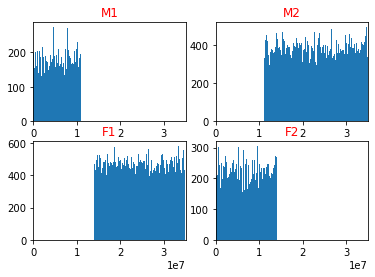

In [18]:
import matplotlib.pyplot as plt

num_bin=370

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(pos1,bins=num_bin)
axs[0, 0].set_title('M1',color='red')
axs[0, 0].set_xlim([0, 35000000])


axs[0, 1].hist(pos2,bins=num_bin)
axs[0, 1].set_title('M2',color='red')
axs[0, 1].set_xlim([0, 35000000])

axs[1, 0].hist(pos3,bins=num_bin)
axs[1, 0].set_title('F1',color='red')
axs[1, 0].set_xlim([0, 35000000])


axs[1, 1].hist(pos4,bins=num_bin)
axs[1, 1].set_title('F2',color='red')
axs[1, 1].set_xlim([0, 35000000])



In [15]:
#read_name_chop_list[:10]

In [27]:
pos_candid_list=[]

for i in range(len(read_name_root_list)):
    
    read_name_root_list_inner=read_name_root_list[i]
    if len(set(read_name_root_list_inner))>1:
        print("error",read_name_root_list_inner)
    pos_list_inner= pos_list[i]
    chrom_list_inner = chrom_list[i]
    read_name_chop_list_inner=read_name_chop_list[i]
    
    if len(set(chrom_list_inner))>1:   # candidate read  
        
        
        chrom_list_inner_parent=set([i[0] for i in chrom_list_inner])
        if len(chrom_list_inner_parent)==1:
            print(chrom_list_inner)
            i_1=0
            first_hap = chrom_list_inner[0]
            next_value = first_hap
            while next_value == first_hap:
                next_value=chrom_list_inner[i_1]
                i_1 +=1
                change_index=i_1-1


            pos_candid_list.append(pos_list_inner[change_index-1])
            pos_candid_list.append(pos_list_inner[change_index])
        
        #print(chrom_list_inner,change_index)
            
            #         a=[]
#         for j in range(len(pos_list_inner)):
#             a.append((pos_list_inner[j],"H"+str(chrom_list_inner[j])))
#         print(a)
        
    


['M2', 'M1', 'M1', 'M1']
['M1', 'M2', 'M1', 'M1']
['M2', 'M1', 'M1', 'M1']
['M1', 'M1', 'M2', 'M2']
['M1', 'M1', 'M2', 'M2']
['M2', 'M1', 'M1', 'M1']
['M2', 'M1', 'M1', 'M1']
['M2', 'M1', 'M1']
['M1', 'M1', 'M1', 'M2']
['M1', 'M2', 'M2', 'M2']
['M1', 'M2', 'M1', 'M1']
['M2', 'M1', 'M1', 'M1']
['M2', 'M2', 'M1', 'M1']
['M1', 'M1', 'M2', 'M2']
['M1', 'M2', 'M1']
['M1', 'M2', 'M2', 'M2']
['M2', 'M2', 'M2', 'M1']
['M1', 'M2', 'M2', 'M2']
['M2', 'M1', 'M1', 'M1']
['M2', 'M1', 'M1', 'M1']
['M2', 'M2', 'M1']
['M1', 'M2', 'M2', 'M2']
['M1', 'M1', 'M1', 'M2']
['M2', 'M2', 'M2', 'M1']
['M2', 'M2', 'M2', 'M1']
['M2', 'M2', 'M2', 'M1']
['M1', 'M1', 'M2']
['M1', 'M2', 'M2']
['M2', 'M2', 'M1', 'M1']
['M2', 'M2', 'M1', 'M1']
['M2', 'M2', 'M2', 'M1']
['M2', 'M2', 'M1']
['M2', 'M2', 'M1']
['M2', 'M1']
['M1', 'M2', 'M2']
['M1', 'M2', 'M2', 'M2']
['M1', 'M1', 'M1', 'M2']
['M1', 'M2', 'M2', 'M2']
['M1', 'M1', 'M2', 'M1']
['M2', 'M2', 'M1', 'M1']
['M1', 'M1', 'M1', 'M2']
['M1', 'M2', 'M1', 'M1']
['M2', 'M2

In [6]:
#pos_candid_list

In [28]:
treshold_coverage_breakpoint = 1
resolution_value = 1000    # rounding the pos candidate


pos_candid_list_round = [resolution_value*int(i/resolution_value)  for i in pos_candid_list]

pos_candid_list_round_treshld = []
count_candid_list_round_treshld = []
pos_candid_list_round_unq=  list(np.sort(list(set(pos_candid_list_round))))


print("Number of candidate positions is",len(pos_candid_list_round_unq))

for pos_candidate in pos_candid_list_round_unq:
    count_i = pos_candid_list_round.count(pos_candidate)
    #print(pos_candidate,count_i)
    if count_i > treshold_coverage_breakpoint :
        pos_candid_list_round_treshld.append(pos_candidate)
        count_candid_list_round_treshld.append(count_i)
        print(pos_candidate,count_i)

num_candid= len(pos_candid_list_round_treshld)
print("Number of candidate positions after tresholdin",treshold_coverage_breakpoint,"is",num_candid)



Number of candidate positions is 78
2492000 2
2494000 7
2495000 8
2496000 9
2497000 4
2498000 6
2499000 7
2500000 8
2501000 6
10995000 6
10996000 11
10997000 11
10998000 8
10999000 10
11000000 12
11001000 8
13993000 2
13995000 8
13996000 15
13997000 10
13998000 6
13999000 13
14000000 12
14001000 3
Number of candidate positions after tresholdin 1 is 24


In [8]:
pos_candid_list_round_treshld

[10996000,
 10997000,
 10999000,
 11000000,
 13995000,
 13996000,
 13997000,
 13998000,
 13999000,
 14000000]

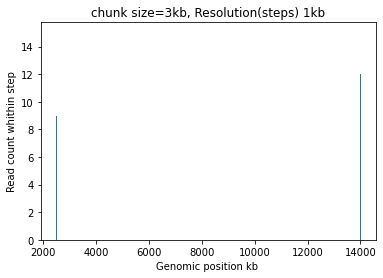

In [29]:
import matplotlib.pyplot as plt

import numpy as np

pos_candid_list_round_treshld_kb=[i/1000 for i in pos_candid_list_round_treshld]
plt.bar(pos_candid_list_round_treshld_kb,count_candid_list_round_treshld ,width=10)  #
#plt.xscale('log') # , nonposy='clip'
plt.title("chunk size=3kb, Resolution(steps) 1kb")
plt.ylabel("Read count whithin step")
plt.xlabel("Genomic position kb ") 
#plt.yticks([0,1,2])
#plt.xticks(fontsize=8)

#plt.savefig("/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v8h1"+"_plot2.pdf")

plt.show()


In [10]:
# pos_candid_list=[]

# for i in range(len(read_name_root_list)):
    
#     read_name_root_list_inner=read_name_root_list[i]
#     if len(set(read_name_root_list_inner))>1:
#         print("error",read_name_root_list_inner)
#     pos_list_inner= pos_list[i]
#     chrom_list_inner = chrom_list[i]
#     #print(chrom_list_inner)
#     read_name_chop_list_inner=read_name_chop_list[i]
    
#     if len(set(chrom_list_inner))>1:   # candidate read  
        
#         check1= False
#         for i in chrom_list_inner:
#             check1= check1 and i[0] == 'F'        
        
#         if check1:
            
#             print(chrom_list_inner)
#             i_1=0
#             first_hap = chrom_list_inner[0]
#             next_value = first_hap
#             while next_value == first_hap:
#                 next_value=chrom_list_inner[i_1]
#                 i_1 +=1
#                 change_index=i_1-1


#             pos_candid_list.append(pos_list_inner[change_index-1])
#             pos_candid_list.append(pos_list_inner[change_index])
        
    
    

In [11]:
# i=10
# read_name_root_list_inner=read_name_root_list[i]
# pos_list_inner= pos_list[i]
# chrom_list_inner = chrom_list[i]
# read_name_chop_list_inner=read_name_chop_list[i]
# read_name_chop_list_inner, chrom_list_inner

In [12]:
# chrom_list_inner=[1,1,1,2,1,2]
# i_1=0
# next_value = first_hap
# while next_value == first_hap:
#     next_value=chrom_list_inner[i_1]
#     i_1 +=1
#     change_index=i_1-1
# print(change_index)
# print("done")
# #         #done_last=True

# # for ii in range(1,len(pos_list_inner)):

# #     if chrom_list_inner[ii] 
# #         print(ii,first_hap,chrom_list_inner[ii])

# # a1 = pos_list_inner[j]



In [13]:
count_candid_list_round_treshld, pos_candid_list_round_treshld

([5, 3, 5, 2, 3, 3, 10, 2, 3, 9],
 [10996000,
  10997000,
  10999000,
  11000000,
  13995000,
  13996000,
  13997000,
  13998000,
  13999000,
  14000000])

In [14]:
import matplotlib.pyplot as plt

# plt.hist(pos_candid_list_round)
# plt.show()

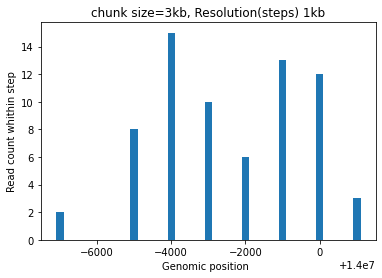

In [30]:

pos_candid_list_round_treshld2=[]
count_candid_list_round_treshld2= []
for i in range(len(pos_candid_list_round_treshld)):
    if pos_candid_list_round_treshld[i] > 13000000:
        pos_candid_list_round_treshld2.append(pos_candid_list_round_treshld[i])
        count_candid_list_round_treshld2.append(count_candid_list_round_treshld[i])
        

pos_candid_list_round_treshld_kb=[i for i in pos_candid_list_round_treshld2]
plt.bar(pos_candid_list_round_treshld_kb,count_candid_list_round_treshld2,width=200) 
#plt.xscale('log') # , nonposy='clip'
plt.title("chunk size=3kb, Resolution(steps) 1kb")
plt.ylabel("Read count whithin step")
plt.xlabel("Genomic position  ") 
#plt.yticks([0,1,2])
#plt.xticks(fontsize=8)

#plt.savefig("/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v8h1"+"_plot2.pdf")

plt.show()


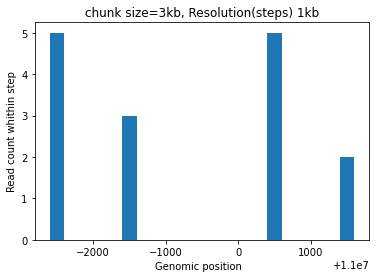

In [16]:

pos_candid_list_round_treshld2=[]
count_candid_list_round_treshld2= []
for i in range(len(pos_candid_list_round_treshld)):
    if pos_candid_list_round_treshld[i] < 13000000:
        pos_candid_list_round_treshld2.append(pos_candid_list_round_treshld[i])
        count_candid_list_round_treshld2.append(count_candid_list_round_treshld[i])
        

pos_candid_list_round_treshld_kb=[i+1500 for i in pos_candid_list_round_treshld2]
plt.bar(pos_candid_list_round_treshld_kb,count_candid_list_round_treshld2,width=200) 
#plt.xscale('log') # , nonposy='clip'
plt.title("chunk size=3kb, Resolution(steps) 1kb")
plt.ylabel("Read count whithin step")
plt.xlabel("Genomic position  ") 
#plt.yticks([0,1,2])
#plt.xticks(fontsize=8)

#plt.savefig("/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v8h1"+"_plot2.pdf")

plt.show()


In [31]:
MeanShift_bandwidth= 200*1000



predicted_pos_final  = []
if num_candid>1:


    pos_candid_list_round_treshld = np.array(pos_candid_list_round_treshld)
    count_candid_list_round_treshld = np.array(count_candid_list_round_treshld)
    pos_candid_list_round_treshld_reshped = pos_candid_list_round_treshld.reshape(-1, 1)


    try:
        clustering = MeanShift(bandwidth=MeanShift_bandwidth,bin_seeding=True).fit(pos_candid_list_round_treshld_reshped)  # n_jobs= -1 using all cores.
        #print(clustering.labels_)
    except MemoryError:  # how to handle this?
        log_excepttion(MemoryError)
        exit(1)

    clusters_labels=clustering.labels_
    # cluster labels are not in order, the first one may be 1, next 0 next 2!  # array([1, 1, 0, 0, 0, 2, 2])
    cluster_unique, cluster_id = np.unique(clusters_labels, return_index=True)
    cluster_unique_order_preserved = cluster_unique[np.argsort(cluster_id)]

    for cluster_id  in cluster_unique_order_preserved:
        indices_this_cluster = np.where(clusters_labels == cluster_id)  # indices of alleles in the combined list which are estimated to be in this cluster
        pos_this_cluster = pos_candid_list_round_treshld[indices_this_cluster[0]]
        count_this_cluster = count_candid_list_round_treshld[indices_this_cluster]
        predicted_pos= round(sum(pos_this_cluster*count_this_cluster)/sum(count_this_cluster))
        predicted_pos_final.append(predicted_pos)
    print(predicted_pos_final)

else:
    print("No recombination spot is detected. ")


[2497211, 10998106, 13997594]


# post filtering


In [ ]:



#vcf_file_address= "/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v11a/t1/var_mother/phased.vcf"  #p7c/phased_M.vcf"


# file_input_mother_phasing_address=  file_input_project_address+ "var_mother/phased.vcf"
# file_input_father_phasing_address=  file_input_project_address+  "var_father/phased.vcf"

vcf_file_mother = open(file_input_mother_phasing_address,'r')
id_blocks_mother = set()  

for line in vcf_file_mother:
    line_strip = line.strip()
    if line_strip.startswith('#'):
        pass
    else:
        line_parts=line_strip.split('\t')
        format_genotype, values_genotype = line_parts[8:10]    # 'GT:GQ:DP:AF:GL:PS', '0|1:255:.:.:.,0,.:60780'
        values_genotype_splitted = values_genotype.split(':')
        format_genotype_splitted = format_genotype.split(':')
        gt_index = format_genotype_splitted.index("GT")           #  index of allele in  values_genotype
        allele = values_genotype_splitted[gt_index]
        if (allele == '0|1' or allele == '1|0'):
            ps_index = format_genotype_splitted.index("PS")           #  index of phase set in values_genotype
            id_block = values_genotype_splitted[ps_index]
            id_blocks_mother.add(id_block)
vcf_file_mother.close()
print(id_blocks_mother)



vcf_file_father = open(file_input_father_phasing_address,'r')
id_blocks_father = set()  

for line in vcf_file_father:
    line_strip = line.strip()
    if line_strip.startswith('#'):
        pass
    else:
        line_parts=line_strip.split('\t')
        format_genotype, values_genotype = line_parts[8:10]    # 'GT:GQ:DP:AF:GL:PS', '0|1:255:.:.:.,0,.:60780'
        values_genotype_splitted = values_genotype.split(':')
        format_genotype_splitted = format_genotype.split(':')
        gt_index = format_genotype_splitted.index("GT")           #  index of allele in  values_genotype
        allele = values_genotype_splitted[gt_index]
        if (allele == '0|1' or allele == '1|0'):
            ps_index = format_genotype_splitted.index("PS")           #  index of phase set in values_genotype
            id_block = values_genotype_splitted[ps_index]
            id_blocks_father.add(id_block)
vcf_file_father.close()
print(id_blocks_father)


id_blocks= list(id_blocks_father.union(id_blocks_mother))


In [66]:
predicted_pos_final_filter=predicted_pos_final[:]
for predicted_pos in predicted_pos_final:
    for i in id_blocks:
        switch=int(i)
        if predicted_pos<switch+5000 and predicted_pos>switch-5000:
            print("possible wrong", predicted_pos)
            predicted_pos_final_filter.remove(predicted_pos)
            break


print(predicted_pos_final_filter)

possible wrong 2497211
[10998106, 13997594]


[2, 3, 5]

In [ ]:
pos_this_cluster

In [ ]:
pos_this_cluster

In [ ]:
count_this_cluster

In [ ]:
import matplotlib.pyplot as plt

plt.hist(pos_candid_list,bins=10000,width=10000) # , bins=10
#plt.show()
plt.savefig(file_add+"_plot.png")


In [ ]:
#len(pos_candid_list)


In [ ]:
mostFrequent_pos = max(set(pos_list), key = pos_list.count)

print(mostFrequent_pos)
second_pos_list=[i for  i  in pos_list if i!=mostFrequent_pos  ]

second_mostFrequent_pos = max(set(second_pos_list), key = second_pos_list.count)

print(second_mostFrequent_pos)

pos_list.count(mostFrequent_pos)

In [ ]:
plt.hist(pos_list,bins=1000,width=50000) # , bins=10
plt.show()
#plt.savefig(file_add+"_plot.png")


In [ ]:

thresh =30
pos_list_estimate_high = []
pos_list_estimate_unq=  list(set(pos_list_estimate))
    
for i in pos_list_estimate_unq:
    
    count_i = pos_list_estimate.count(i)
    if count_i>thresh :
        pos_list_estimate_high.append(i)
        
        
print(len(pos_list_estimate_high))

In [ ]:
pos_list_estimate_high[:3]

In [21]:
import numpy as np
file_recomb_addrss="genetic_map_chr22_combined_b37.txt"


file_recomb= open(file_recomb_addrss,'r');


hot_list_pos_recomb=[]
hot_list_pos_rate=[]
hot_list_pos_cm = []

for line in file_recomb:
    line_strip = line.strip()
    
    if line_strip.startswith('p'):
        header1=line_strip
    else:
        
        vals = line_strip.split()   # last line of header contains sample name
        pos_recomb=vals[0]
        pos_rate=vals[1]
        pos_cm = vals[2]
        
        hot_list_pos_rate.append(float(pos_rate))
        hot_list_pos_recomb.append(int(pos_recomb))
        hot_list_pos_cm.append(float(pos_cm))
print(len(hot_list_pos_recomb))
print(len(hot_list_pos_rate), np.mean(hot_list_pos_rate),max(hot_list_pos_rate))
print(len(hot_list_pos_cm), np.mean(hot_list_pos_cm),max(hot_list_pos_cm))




43414
43414 2.6570552871199062 91.4555186615
43414 40.53485006400229 75.1198605516705


In [ ]:

hot_list_pos_recomb_high=[]
hot_list_pos_rate_high= [ ]

for pos_i, pos_rate in enumerate(hot_list_pos_rate):
    
    
    if pos_rate>10:
        hot_list_pos_recomb_high.append(hot_list_pos_recomb[pos_i])
        hot_list_pos_rate_high.append(hot_list_pos_rate[pos_i])
        
        
print(len(hot_list_pos_recomb_high))

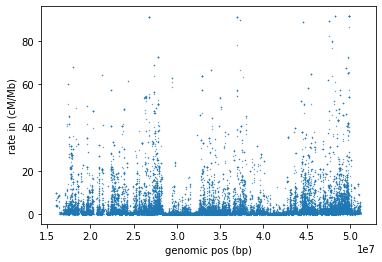

In [22]:

plt.scatter(hot_list_pos_recomb,hot_list_pos_rate, s= .1) # , bins=10
plt.xlabel('genomic pos (bp)')
plt.ylabel('rate in (cM/Mb)')
plt.show()

#plt.savefig(file_add+"_plot.png")



In [ ]:

plt.scatter(hot_list_pos_recomb_high,hot_list_pos_rate_high, s= .1) # , bins=10
plt.xlabel('genomic pos (bp)')
plt.ylabel('rate in (cM/Mb)')
plt.show()

#plt.savefig(file_add+"_plot.png")



In [ ]:

file_add1="/users/smajidi1/"

plt.scatter(hot_list_pos_recomb_high,hot_list_pos_rate_high, s= .5) # , bins=10
plt.xlabel('genomic pos (bp)')
plt.ylabel('rate in (cM/Mb)')
for xc in pos_list_estimate_high:
    plt.axvline(x=xc,linewidth =.04,color="r")
    
plt.savefig(file_add1+"_plot.pdf")
    
    
    

In [ ]:
pos_list_estimate_high[:2]

In [ ]:

list_pos_overlap = pos_list

correct_pos=0
for pos_overlap in list_pos_overlap:
    
    for pos_recomb in list_pos_recomb_high:
        
        if pos_recomb < pos_overlap+500 and pos_recomb > pos_overlap-500 :
            correct_pos+=1
            
print(correct_pos,len(list_pos_overlap),len(list_pos_recomb_high)) 
    

In [ ]:
plt.scatter(pos_list) # , bins=10
plt.show()
#plt.savefig(file_add+"_plot.png")



In [ ]:
#for pos_overlap in list_pos_overlap:

pos_overlap= 16980000

for i in range(len(hot_list_pos_recomb)):
    pos_recomb= hot_list_pos_recomb[i]
    rate = hot_list_pos_rate [i]
    

    if pos_recomb < pos_overlap+5000 and pos_recomb > pos_overlap-5000 :
        print(pos_recomb,rate)

In [ ]:

list_pos_overlap = pos_list

correct_pos=0
for pos_overlap in list_pos_overlap:
    
    for pos_recomb in list_pos_recomb_high:
        
        if pos_recomb < pos_overlap+500 and pos_recomb > pos_overlap-500 :
            correct_pos+=1
            
print(correct_pos,len(list_pos_overlap),len(list_pos_recomb_high)) 
    

In [ ]:
correct_pos=0
for pos_overlap in list_pos_recomb_high:
    
    for pos_recomb in list_pos_recomb_high:
        
        if pos_recomb < pos_overlap+500 and pos_recomb > pos_overlap-500 :
            correct_pos+=1
            
print(correct_pos,len(list_pos_recomb_high),len(list_pos_recomb_high)) 
    

In [ ]:
list_pos_recomb_high

In [ ]:
#import math
np.log(1.6755414512199618e-06)


{'2480', '5574706', '2501547', '5485738'}
{'5485661', '296', '5572781'}


NameError: name 'format_genotype_splittedz' is not defined